# Chapter 3 Detection & Estimation

## Example3.1 page 120

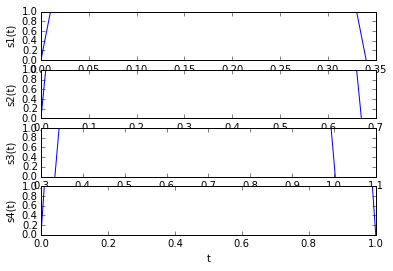

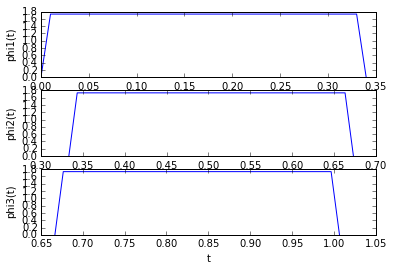

In [40]:
from __future__ import division
from numpy import arange, ones, sqrt
%matplotlib inline
from matplotlib.pyplot import plot, subplot, xlabel,ylabel,title, show

#using Gram-Schmidt orthogonalization procedure
T = 1#
t1 = arange(0,0.01+T/3,0.01)
t2 = arange(0,0.01+2*T/3,0.01)
t3 = arange(T/3,0.01+T,0.01)
t4 = arange(0,0.01+T,0.01)
s1t = [0]+[x for x in ones(len(t1)-2)]+[0]
s2t = [0]+[x for x in ones(len(t2)-2)]+[0]
s3t = [0]+[x for x in ones(len(t3)-2)]+[0]
s4t = [0]+[x for x in ones(len(t4)-2)]+[0]
t5 = arange(0,0.01+T/3,0.01)
phi1t =  [sqrt(3/T)*x for x in [0]+[x for x in ones(len(t5)-2)]+[0]]
t6 =arange(T/3,0.01+2*T/3,0.01)
phi2t = [sqrt(3/T)*x for x in [0]+[x for x in ones(len(t6)-2)]+[0]]
t7 = arange(2*T/3,0.01+T,0.01)
phi3t = [sqrt(3/T)*x for x in [0]+[x for x in ones(len(t7)-2)]+[0]]

#figure
title('Figure3.4(a) Set of signals to be orthonormalized')
subplot(4,1,1)
plot(t1,s1t)
xlabel('t')
ylabel('s1(t)')
subplot(4,1,2)
plot(t2,s2t)
xlabel('t')
ylabel('s2(t)')
subplot(4,1,3)
plot(t3,s3t)
xlabel('t')
ylabel('s3(t)')
subplot(4,1,4)
plot(t4,s4t)
xlabel('t')
ylabel('s4(t)')
show()


#figure
title('Figure3.4(b) The resulting set of orthonormal functions')
subplot(3,1,1)
plot(t5,phi1t)
xlabel('t')
ylabel('phi1(t)')
subplot(3,1,2)
plot(t6,phi2t)
xlabel('t')
ylabel('phi2(t)')
subplot(3,1,3)
plot(t7,phi3t)
xlabel('t')
ylabel('phi3(t)')
show()

## Example3.2 page 121

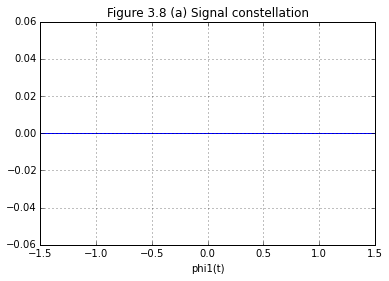

Figure 3.8 (b).Representation of transmitted dibits
Loc. of meg.point| (-3/2)asqrt(T)|(-1/2)asqrt(T)|(3/2)asqrt(T)|(1/2)asqrt(T)
________________________________________________________________________________
Transmitted dibit|         00    |      01      |   11        |   10


Figure 3.8 (c). Decision intervals for received dibits
Received dibit     |     00          |      01       |   11          |   10
________________________________________________________________________________
Interval on phi1(t)| x1 < -a.sqrt(T) |-a.sqrt(T)<x1<0| 0<x1<a.sqrt(T) | a.sqrt(T)<x1
0.0049504950495


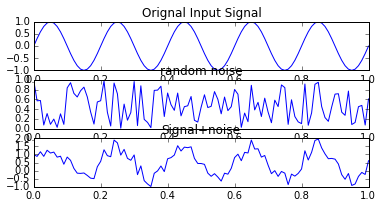

In [1]:
from __future__ import division
from numpy import sqrt,arange,random,sin,pi,zeros,multiply
%matplotlib inline
from matplotlib.pyplot import plot,subplot,xlabel,ylabel,title,show,grid

#Signal constellation and Representation of dibits
a =1#  #amplitude =1
T =1# #Symbol duration in seconds
#Four  message points
Si1 = [(-3/2)*a*sqrt(T),(-1/2)*a*sqrt(T),(3/2)*a*sqrt(T),(1/2)*a*sqrt(T)]
plot(Si1,[0,0,0,0])
xlabel('phi1(t)')
title('Figure 3.8 (a) Signal constellation')
grid()
show()
print 'Figure 3.8 (b).Representation of transmitted dibits'
print 'Loc. of meg.point| (-3/2)asqrt(T)|(-1/2)asqrt(T)|(3/2)asqrt(T)|(1/2)asqrt(T)'
print '________________________________________________________________________________'
print 'Transmitted dibit|         00    |      01      |   11        |   10'
print ''
print ''
print 'Figure 3.8 (c). Decision intervals for received dibits'
print 'Received dibit     |     00          |      01       |   11          |   10'
print '________________________________________________________________________________'
print 'Interval on phi1(t)| x1 < -a.sqrt(T) |-a.sqrt(T)<x1<0| 0<x1<a.sqrt(T) | a.sqrt(T)<x1'
 
#Implementation of LMS ADAPTIVE FILTER
#For noise cancellation application
order = 18#
t =arange(0,0.01+1,0.01)
x = [sin(2*pi*5*tt) for tt in t]
noise =random.rand(len(x))
x_n = x+noise#
ref_noise = [noise*xx for xx in random.rand(10)]
w = zeros([order,1])


mu = 0.01*(sum(multiply(x,x))/len(x))

print mu

N = len(x)#
desired=[]
for k in range(0,1010):
    for i in range(0,N-order-1):
        if i < len(ref_noise):
            buffer = ref_noise[i]#,i+order-1]
            desired.append(x_n[i]-buffer*w)
            w = w+(buffer*mu*desired[i])
  

subplot(4,1,1)
plot(t,x)
title('Orignal Input Signal')
subplot(4,1,2)
plot(t,noise)
title('random noise')
subplot(4,1,3)
plot(t,x_n)
title('Signal+noise')
show()

## Example3.3 page 123

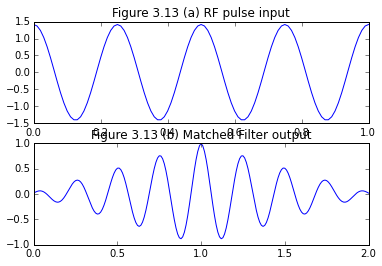

In [34]:
from __future__ import division
from numpy import arange,sqrt,cos,pi,convolve
%matplotlib inline
from matplotlib.pyplot import plot,subplot,title,show


fc =4# #carrier frequency in Hz
T =1#
t1 = arange(0,0.01+T,0.01)
phit = [sqrt(2/T)*xx for xx in cos(2*pi*fc*t1)]
hopt = phit#

phiot = convolve(phit,hopt)#
phiot = [yy/max(phiot) for yy in phiot]

t2 = arange(0,0.01+2*T,0.01)
subplot(2,1,1)
plot(t1,phit)#
title('Figure 3.13 (a) RF pulse input')
subplot(2,1,2)
plot(t2,phiot)#
title('Figure 3.13 (b) Matched Filter output')
show()

## Example3.4 page 124

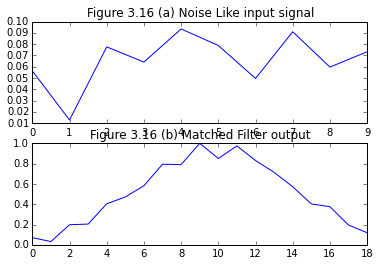

In [40]:
from __future__ import division
from numpy import random,convolve
%matplotlib inline
from matplotlib.pyplot import plot,subplot,title,show


phit = [0.1*xx for xx in random.uniform(0,1,10)]
hopt = phit
phi0t = convolve(phit,hopt)
phi0t = [yy/max(phi0t) for yy in phi0t]
subplot(2,1,1)
plot(range(0,len(phit)),phit)
title('Figure 3.16 (a) Noise Like input signal')
subplot(2,1,2)
plot(range(0,len(phi0t)),phi0t)
title('Figure 3.16 (b) Matched Filter output')
show()

## Example3.6 page 127

In [41]:
from __future__ import division

Rxx = [0.6, 1, 0.6]
h01 = Rxx[2]/Rxx[1]#  #Rxx(2) = Rxx(0), Rxx(3) = Rxx(1)
sigma_E = Rxx[1] - h01*Rxx[2]
sigma_X = Rxx[1]
print 'Predictor-error variance',sigma_E
print sigma_X,'Predictor input variance',sigma_X
if(sigma_X > sigma_E):
    print 'The predictor-error variance is less than the variance of the predictor input'


Predictor-error variance 0.64
1 Predictor input variance 1
The predictor-error variance is less than the variance of the predictor input
